# Risk factors associated with developing heart disease

## About this project
***

This project aims to simulate the **risk of a person developing heart disease** (our [dependent variable](https://www.verywellmind.com/what-is-a-dependent-variable-2795099)) based on 3 [independent variables](https://www.verywellmind.com/what-is-the-independent-variable-2795278):
1. The **number of cigarettes** the person smokes per day
2. The person's **Body Mass Index (BMI)**, calculated as the person's weight divided by their heights squared
3. The person's **total cholesterol** levels

Our task is to build a dataframe using simulated data for each of these variables. To 'mimic' the behaviour of the data, their likely distribution and nature, as well as the relationships between independent and dependent variables, however, we have to rely on real-world data - in our case, data collected for the famous [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study).

## The Framingham Heart Study
***

<p>In the Autumn of 1948, a pioneer study on risk factors associated with developing heart disease kickstarted in the small town of Framingham, Massachussetts. Despite being the cause of roughly half of the deaths in the US in the early 1940's, cardiovascular disease was still poorly understood in terms of prevention and treatment [1]. So much so that some argue that even the then US President, Frankling D. Roosevelt could have lived longer if only his first signs of cardiovascular disease have been detected earlier [1].The Framingham Heart Study aimed at filling that knowledge gap and investigated which factors (behavioural, physiological, demographic etc) were playing a part in the development of heart disease.</p>

<p>In its first round, the study evaluated health parametres of 5,209 residents of the town, such as their dietary, exercising, and smoking habits, blood pressure, heart rate, age, and history of underlying conditions (e.g. diabetes, and/or strokes).</p>

<p>When the results of the study were published nine years later, in 1957, it was the first time that tobacco consumption, obesity, high cholesterol and high blood pressure were linked with a higher risk of someone developing cardiovascular disease [2]. Since then, the study was granted funding for additional rounds, evaluating these and other parametres among the children and grandchildren of the original cohorts. It is still being conducted to this day, having gathered and analysed epidemiological data from more than 15,000 individuals from three generations for more than 70 years [3].</p>

## Simulating data
***

<p>Data simulation is a process of generating random data following stochastic - or random - processes (i.e. processes of collecting random variables that are indexed against another variable or set of variables) [4][5]. Running a simulation is useful when you know the nature and the likely behaviour of different variables in a given system, but wants to understand their interdependencies, how they impact a given outcome, or to test the validity of a model or an algorithm.</p>



In [1]:
#For creating arrays
import numpy as np

#Dataframes
import pandas as pd

#For plotting
import matplotlib.pyplot as plt

#For truncated normal distribution
import scipy.stats as stats

### Cigarettes per day

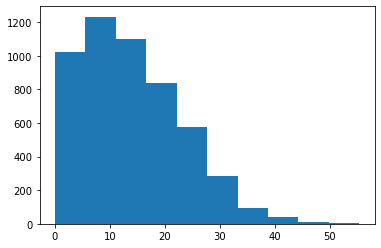

In [18]:
no_smoker = 0
heavy_smoker = 70
mu = 9
sigma = 12
sample = 5209

cigs_per_day = stats.truncnorm.rvs(
          (no_smoker-mu)/sigma,(heavy_smoker-mu)/sigma,loc=mu,scale=sigma,size=sample)

plt.hist(cigs_per_day)
plt.show()


### BMI

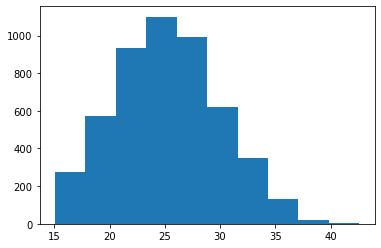

In [4]:
lower = 15
upper = 50
mu = 25
sigma = 5
sample = 5209

bmi = stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=sample)


plt.hist(bmi)

plt.show()

### Cholesterol

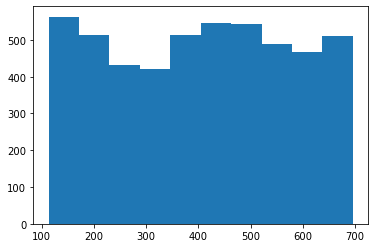

In [14]:
valuerange = np.arange(113,697)

p = np.random.rand(len(valuerange))
p = p / p.sum()

chol = np.random.choice(a=valuerange, size=5000, p=p)

plt.hist(chol)
plt.show()

## Dataframe

In [6]:
data = np.array([cigs_per_day,bmi,chol])

print(data)

[[  7.           5.           5.         ...   5.           5.
    4.        ]
 [ 28.4298766   24.07236718  27.43066864 ...  28.05308649  26.54517638
   22.9768869 ]
 [330.         337.         406.         ... 273.         262.
  683.        ]]


In [7]:
df = pd.DataFrame(data).transpose()

In [8]:
df.columns = ['Cigarettes per day', 'BMI', 'Cholesterol']
df

,Cigarettes per day,BMI,Cholesterol
0,7.0,28.429877,330.0
1,5.0,24.072367,337.0
2,5.0,27.430669,406.0
3,4.0,19.454446,571.0
4,3.0,29.218041,522.0
...,...,...,...
4995,8.0,20.666335,333.0
4996,6.0,27.746326,228.0
4997,5.0,28.053086,273.0
4998,5.0,26.545176,262.0


In [10]:
#Define list of conditions

conditions = [
    (df['Cigarettes per day'] >= 5) & (df['BMI'] >= 30) & (df['Cholesterol'] >= 240),
    (df['Cigarettes per day'] >= 10) & (df['BMI'] >= 20) & (df['Cholesterol'] >= 200),
    (df['Cigarettes per day'] >= 15) & (df['BMI'] >= 18.5),
    (df['Cigarettes per day'] >= 20),
    (df['BMI'] >= 30),
    (df['Cholesterol'] >= 350)
]



#Set the new column values according to conditions
risk = ['yes','yes','yes','yes','yes','yes']

#Add new column based on conditions and risk:
df['Risk of heart disease'] = np.select(conditions, risk, default='no')

df

,Cigarettes per day,BMI,Cholesterol,Risk of heart disease
0,7.0,28.429877,330.0,no
1,5.0,24.072367,337.0,no
2,5.0,27.430669,406.0,yes
3,4.0,19.454446,571.0,yes
4,3.0,29.218041,522.0,yes
...,...,...,...,...
4995,8.0,20.666335,333.0,no
4996,6.0,27.746326,228.0,no
4997,5.0,28.053086,273.0,no
4998,5.0,26.545176,262.0,no


In [11]:
df.loc[1000]

Cigarettes per day            4.0
BMI                      33.49995
Cholesterol                 502.0
Risk of heart disease         yes
Name: 1000, dtype: object

## References
***

In [ ]:
[1]. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4159698/
[2]. https://www.britannica.com/event/Framingham-Heart-Studay
[3]. https://framinghamheartstudy.org/
[4]. https://www.sciencedirect.com/topics/earth-and-planetary-sciences/data-simulation
[5]. https://www.britannica.com/science/stochastic-process